In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./clem.mplstyle')
import seaborn as sns
from matplotlib.lines import Line2D
plt.rcParams["axes.facecolor"] = "white"
import pandas as pd

# ['001139426','001306366','00701782','00682507']

In [4]:
def get_galactic_coord(ra, dec):
    from astropy import units as u
    from astropy.coordinates import SkyCoord
    
    gc_celestial = SkyCoord(frame='icrs', ra=ra*u.degree, dec=dec*u.degree)
    gc_galactic = gc_celestial.galactic
    
    return gc_galactic

In [25]:
expid = '001139426'

header = np.loadtxt(f'gc_instcats/instcat_trilegal_{expid}.txt', dtype='str', max_rows=20)
header = {h[0]: float(h[1]) for h in header}

instcat = np.loadtxt(f'gc_instcats/instcat_trilegal_{expid}.txt', dtype='str', skiprows=20)
ra = np.array([float(i[2]) for i in instcat])
dec = np.array([float(i[3]) for i in instcat])
magnorm = np.array([float(i[4]) for i in instcat])

gc = np.loadtxt(f'gc_instcats/gc_values_{expid}.txt')

In [26]:
gal = get_galactic_coord(header['rightascension'], header['declination'])

# expid, ra, dec, gal l, gal b, n_stars, n_stars w g>24.5, p_thin, p_thick, p_halo, p_bulge
summary = [
    expid,
    header['rightascension'],
    header['declination'],
    gal.l.wrap_at('180d').degree, 
    gal.b.degree,
    len(ra),
    len(ra[magnorm<24.5]),
    len(ra[gc==1]) / len(ra),
    len(ra[gc==2]) / len(ra),
    len(ra[gc==3]) / len(ra),
    len(ra[gc==4]) / len(ra),
]

summary_f = './gc_instcats/pointing_summaries.txt'
with open(summary_f, 'a') as f:
    f.write(' '.join([str(s) for s in summary])+'\n')

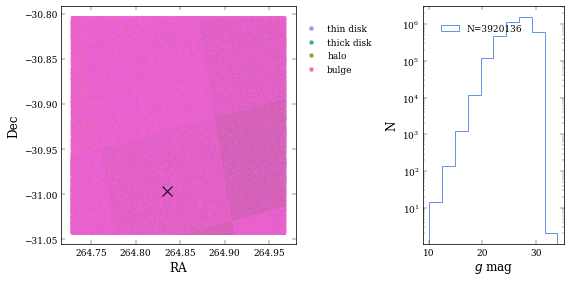

In [27]:
f, a = plt.subplots(1,2, figsize=(8,4), gridspec_kw={'width_ratios':[1,0.6]})
# thin disk=1, thick disk=2, halo=3, bulge=4

# List of RGB triplets
rgb_values = sns.color_palette("husl", 4)[::-1]
# Map label to RGB
color_map = sns.color_palette("husl", 4, as_cmap=True)

handles = [Line2D([0], [0], color=rgb_values[0], marker='o', linestyle='', label='thin disk'),
           Line2D([0], [0], color=rgb_values[1], marker='o', linestyle='', label='thick disk'),
           Line2D([0], [0], color=rgb_values[2], marker='o', linestyle='', label='halo'),
           Line2D([0], [0], color=rgb_values[3], marker='o', linestyle='', label='bulge')]

a[0].scatter(ra, dec, s=1, c=gc, cmap=color_map, vmin = np.min(gc)-.5, vmax = np.max(gc)+.5)
a[0].plot(header['rightascension'], header['declination'], 'kx', ms=10, markeredgewidth=1)
a[0].set_xlabel('RA')
a[0].set_ylabel('Dec')

a[0].legend(handles=handles, loc='upper left', bbox_to_anchor=(0.95,1))

a[1].hist(magnorm, histtype='step', label=f'N={len(ra)}')
a[1].set_yscale('log')
a[1].set_xlabel('$g$ mag')
a[1].set_ylabel('N')
a[1].legend(loc='upper left')

plt.savefig(f'plots/trilegal_stars_{expid}.png', dpi=200, facecolor='w', transparent=False)

## sky plot

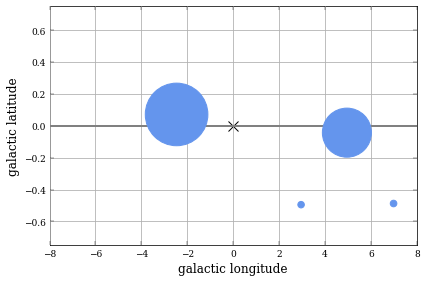

In [39]:
plt.figure(figsize=(6,4))
plt.grid(True, zorder=2)

columns = np.loadtxt('gc_instcats/pointing_summaries.txt', dtype='str', max_rows=1)
summ = np.loadtxt('gc_instcats/pointing_summaries.txt', skiprows=1)

summaries = pd.DataFrame(summ, columns=columns)
    
plt.scatter(summaries['gal_l'], summaries['gal_b'], s=summaries['n_stars']*1e-3, zorder=4)
    
# plt.legend(title='N stars')
plt.plot(0, 0, 'kx', ms=10, markeredgewidth=1)
plt.xlim([-8,8])
plt.ylim([-.75, .75])
plt.axhline(0, lw=2, color='grey', zorder=3)

plt.xlabel('galactic longitude')
plt.ylabel('galactic latitude');

plt.savefig('plots/nstar_pointings.png', dpi=150, facecolor='w', transparent=False) 